In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(
    data=np.concatenate([diabetes['data'], diabetes['target'].reshape(-1, 1)], axis=1),
    columns=diabetes['feature_names'] + ['target']
)

In [4]:
# RAW split
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42,
)

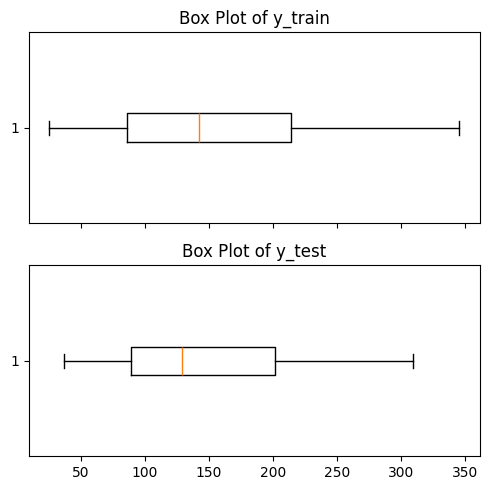

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

axes[0].boxplot(y_train, vert=False)
axes[0].set_title("Box Plot of y_train")

axes[1].boxplot(y_test, vert=False)
axes[1].set_title("Box Plot of y_test")

plt.tight_layout()
plt.show()

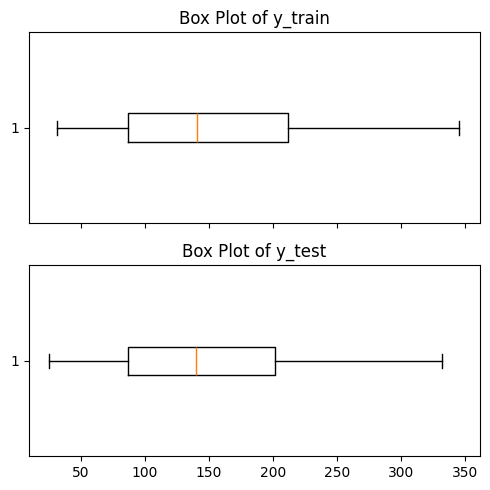

In [6]:
# Stratified(cut) split
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

cuts = pd.cut(y, bins=10, labels=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42, stratify=cuts
)

fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

axes[0].boxplot(y_train, vert=False)
axes[0].set_title("Box Plot of y_train")

axes[1].boxplot(y_test, vert=False)
axes[1].set_title("Box Plot of y_test")

plt.tight_layout()
plt.show()

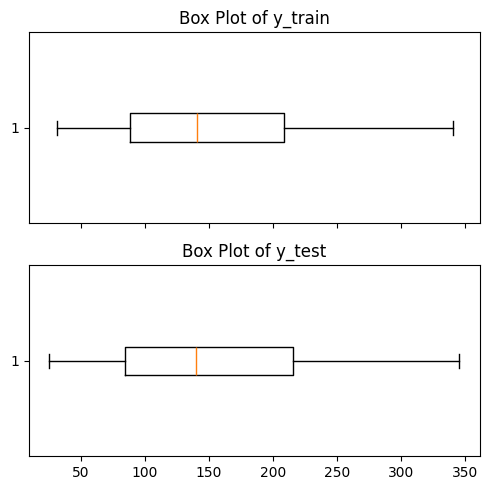

In [7]:
# Stratified(q_cut) split
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

q_cuts = pd.qcut(y, q=10, labels=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42, stratify=q_cuts
)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

axes[0].boxplot(y_train, vert=False)
axes[0].set_title("Box Plot of y_train")

axes[1].boxplot(y_test, vert=False)
axes[1].set_title("Box Plot of y_test")

plt.tight_layout()
plt.show()

In [8]:
"""
is proper train_test_split
"""


def is_proper_split(y_train, y_test):
    from scipy.stats import ks_2samp
    ks_stat, p_value = ks_2samp(y_train, y_test)
    if p_value <= 0.05:
        return False
    return True


is_proper_split(y_train, y_test)

True

In [ ]:
# ks_2samp
"""
ks_2samp는 Kolmogorov-Smirnov (KS) 검정의 두 표본 버전을 제공하는 함수입니다.
이를 사용하여 두 개의 독립적인 데이터 표본이 동일한 분포에서 나왔는지를 검정합니다.
"""